In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
import numexpr as ne
plt.style.use('ggplot')
%matplotlib inline

In [2]:
train_data = pd.read_csv("http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw8/hw8_train.dat", header=None, delim_whitespace = True)
train_x = np.array(train_data.iloc[:,:-1])
train_y = np.array(train_data.iloc[:,-1])
test_data = pd.read_csv("http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw8/hw8_test.dat", header=None, delim_whitespace = True)
test_x = np.array(test_data.iloc[:,:-1])
test_y = np.array(test_data.iloc[:,-1])

In [3]:
from scipy.spatial import distance_matrix

In [4]:
class KNearestNeighbor():
    def __init__(self, k = 1):
        self.k = k
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def predict(self, x, rbf = False):
        dm = distance_matrix(x, self.x)
        arg_s = dm.argsort(axis=1)
        nearest_y = np.array([self.y[idx[:self.k]] for idx in arg_s])
        return np.sign(nearest_y.mean(axis=1))
        

In [5]:
from sklearn.metrics import zero_one_loss

In [6]:
k_parameter = (1,3,5,7,9)

## Problem 12

In [7]:
E_in_12 = []
for k in k_parameter:
    clf = KNearestNeighbor(k = k)
    clf.fit(train_x, train_y)
    g= clf.predict(train_x)
    e_in = zero_one_loss(g, train_y)
    E_in_12.append(e_in)

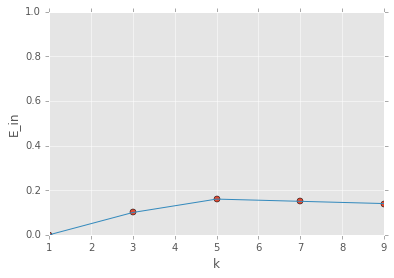

In [8]:
plt.plot(k_parameter, E_in_12, 'o')
plt.plot(k_parameter, E_in_12)
plt.ylim(0,1)
plt.xlabel("k")
plt.ylabel("E_in")
plt.savefig("p12")

## Problem 14

In [9]:
E_out_14 = []
for k in k_parameter:
    clf = KNearestNeighbor(k = k)
    clf.fit(train_x, train_y)
    g= clf.predict(test_x)
    e = zero_one_loss(g, test_y)
    E_out_14.append(e)

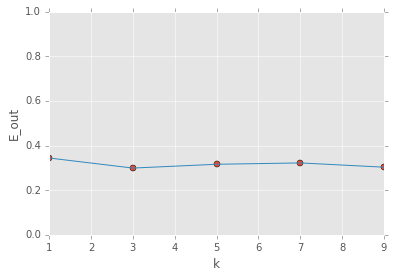

In [10]:
plt.plot(k_parameter, E_out_14, 'o')
plt.plot(k_parameter, E_out_14)
plt.ylim(0,1)
plt.xlabel("k")
plt.ylabel("E_out")
plt.savefig("p14")

In [11]:
class RBF():
    def __init__(self, gamma):
        self.k = k
        self.x = None
        self.y = None
        self.gamma = gamma
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def predict(self, x):
        dm = distance_matrix(x, self.x)
        return np.sign(np.dot(np.exp(-self.gamma*dm**2), self.y))

In [12]:
gamma_parameter = (0.001, 0.1, 1, 10, 100)

## Problem 16

In [13]:
E_in_16 = []
for gamma in gamma_parameter:
    clf = RBF(gamma = gamma)
    clf.fit(train_x, train_y)
    g= clf.predict(train_x)
    e = zero_one_loss(g, train_y)
    E_in_16.append(e)

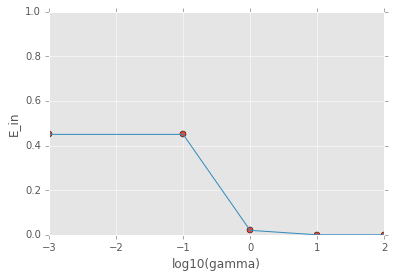

In [14]:
plt.plot(np.log10(gamma_parameter), E_in_16, 'o')
plt.plot(np.log10(gamma_parameter), E_in_16)
plt.ylim(0,1)
plt.xlabel("log10(gamma)")
plt.ylabel("E_in")
plt.savefig("p16")

## Problem 18

In [15]:
E_out_18 = []
for gamma in gamma_parameter:
    clf = RBF(gamma = gamma)
    clf.fit(train_x, train_y)
    g= clf.predict(test_x)
    e = zero_one_loss(g, test_y)
    E_out_18.append(e)

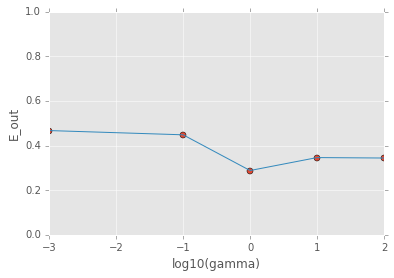

In [16]:
plt.plot(np.log10(gamma_parameter), E_out_18, 'o')
plt.plot(np.log10(gamma_parameter), E_out_18)
plt.ylim(0,1)
plt.xlabel("log10(gamma)")
plt.ylabel("E_out")
plt.savefig("p18")